In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [26]:
df = pd.read_csv('hotel_bookings.csv')

## Data Analysis and Data Cleaning

head function display five row by default

In [6]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15


Display how many column in a dataset

In [7]:
df.shape

(119390, 32)

Display all the column in the dataset

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# this command are used to see that reservation_status_date 
date =pd.to_datetime(df['reservation_status_date'])
# this command are used to change the date format
date.dt.strftime('%d-%m-%y')

C:\Users\hp\AppData\Local\Temp\ipykernel_9964\297003424.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date =pd.to_datetime(df['reservation_status_date'])


0         07-01-15
1         07-01-15
2         07-02-15
3         07-02-15
4         07-03-15
            ...   
119385    09-06-17
119386    09-07-17
119387    09-07-17
119388    09-07-17
119389    09-07-17
Name: reservation_status_date, Length: 119390, dtype: object

this command will  see all the object in data

In [12]:
df.describe( include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21-10-15
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


checked that how many row are unique in to  hotel_data_sheet

In [20]:
for col in df.describe(include=object):
        print(col)
        print(df[col].unique())



hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [28]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

this command will be use to delete two rows in database

In [33]:
df.drop(['agent','company'], axis=1 ,inplace=True)
df.dropna( )

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,07-09-17


<Axes: >

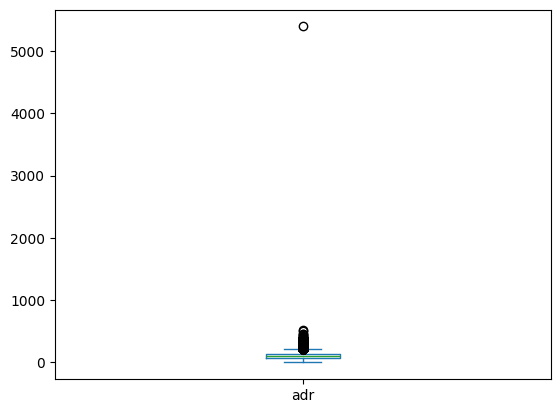

In [34]:
df['adr'].plot(kind='box')

In [35]:
# remove adr
df= df[df['adr']<5000]

<Axes: >

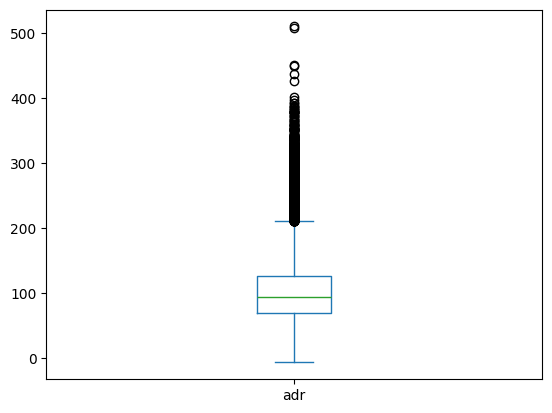

In [36]:
df['adr'].plot(kind='box')

# Data Analysis and Visualizations

is_canceled
0    0.629589
1    0.370411
Name: proportion, dtype: float64


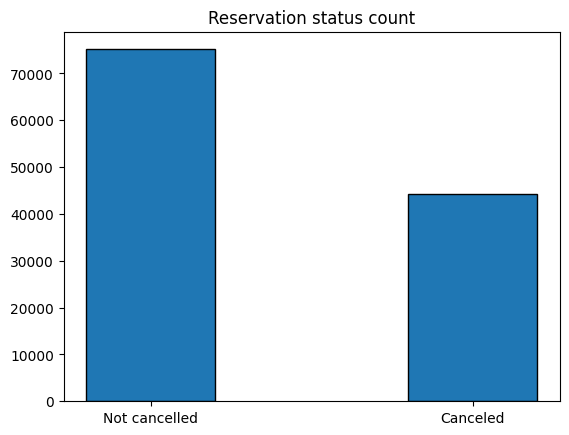

In [37]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)
# plt.figure(Figsize = (5,4))
plt.title('Reservation status count')
# plot a bar plot and add title using set_title 
plt.bar(['Not cancelled' , 'Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.4)
plt.show()

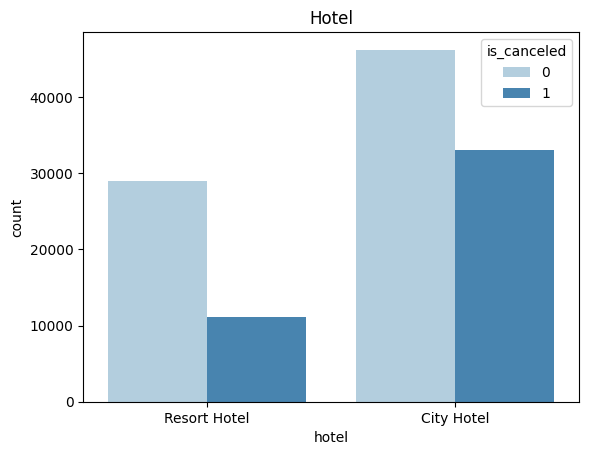

In [38]:
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues').set( 
    title="Hotel") 

<Axes: xlabel='is_canceled', ylabel='hotel'>

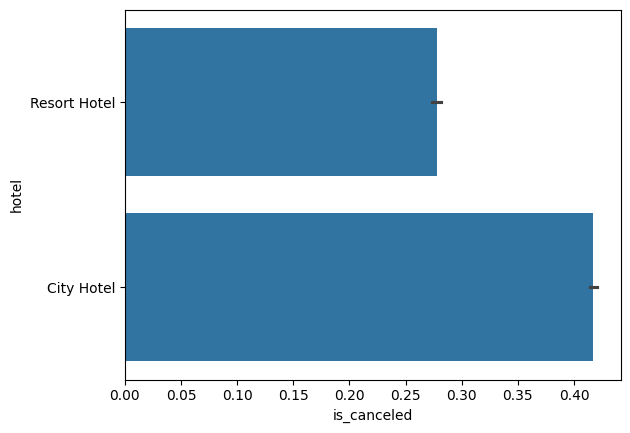

In [52]:
sns.barplot(data=df , x= df['is_canceled'] , y=df['hotel'] )

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

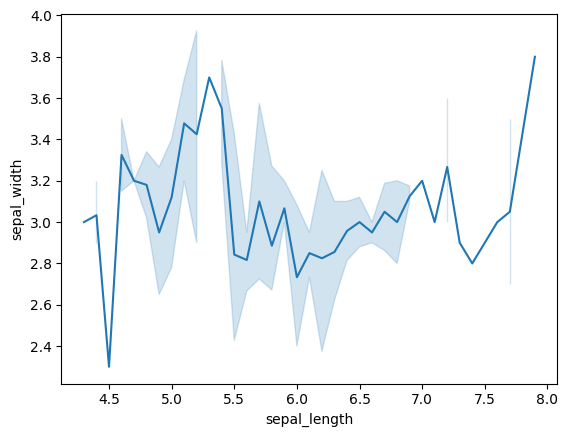

In [40]:

# loading dataset 
data = sns.load_dataset("iris") 

# draw lineplot 
sns.lineplot(x="sepal_length", y="sepal_width", data=data)